In [ ]:
"""
The code was replicated from the following source.
Title: Effective-Handwritten-Digit-Recognition-using-Deep-Convolution-Neural-Network
Authors: Bharadwaj Yellapragada, Kolla Bhanu Prakash, P. Rajaram, V.P. Sriram,  S. Sudhakar 
Date: May 8, 2020
Availability: https://github.com/BharadwajYellapragada/Effective-Handwritten-Digit-Recognition-using-Deep-Convolution-Neural-Network
"""

In [8]:
#imports
from tensorflow import keras
import numpy as np 
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import graphviz
import pydot

In [2]:
# Import dataset
mnist_dataset=keras.datasets.mnist

In [3]:
# extract training and testing set (with labels) from dataset
(train_images,train_labels),(test_images,test_labels) = mnist_dataset.load_data()

In [4]:
print("Number of images in training set: {} \n Number of images in testing set: {}".format(len(train_images),len(test_images)))

Number of images in training set: 60000 
 Number of images in testing set: 10000


In [5]:
#reshape images
train_images = train_images.reshape(len(train_images),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)

4


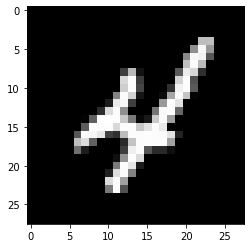

In [6]:
#show sample 
plt.gray()
plt.imshow(train_images[9])
print(train_labels[9])

In [7]:
# create model
model = keras.models.Sequential([
                                 keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                 keras.layers.MaxPool2D(2,2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(28,activation='relu'),
                                 keras.layers.Dense(10,activation='softmax')
])

In [8]:
#print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 28)                302876    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                290       
Total params: 303,806
Trainable params: 303,806
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
#compile model
model.compile(optimizer='adam',metrics=['acc'],loss='sparse_categorical_crossentropy')

In [10]:
#implement early stopping with a patience of 5 epoches 
es=keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [11]:
#fit model 
history=model.fit(train_images,train_labels,epochs=100,callbacks=[es])

Epoch 1/100
1875/1875 [==============================] - 18s 10ms/step - loss: 1.8624 - acc: 0.7014
Epoch 2/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1167 - acc: 0.9677
Epoch 3/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0593 - acc: 0.9823
Epoch 4/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0467 - acc: 0.9858
Epoch 5/100
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0364 - acc: 0.9881
Epoch 6/100
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0331 - acc: 0.9892
Epoch 7/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0252 - acc: 0.9916
Epoch 8/100
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0211 - acc: 0.9929
Epoch 9/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0245 - acc: 0.9921 1s - l
Epoch 10/100
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0182 - acc:

In [12]:
#evalute on test set 
score, acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3235 - acc: 0.9773


In [13]:
#print accuracy of model 
print("accuracy: {:.3%}".format(acc))

accuracy: 97.730%


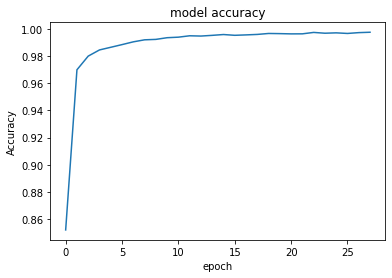

In [18]:
# plot accuracy throughout training
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

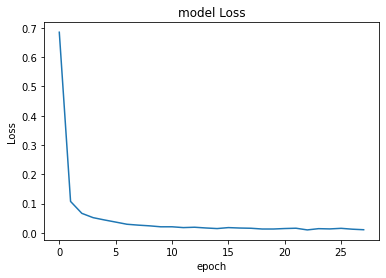

In [20]:
# plot loss throughout training
plt.plot(history.history['loss'])
plt.title('model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [23]:
#save model 
model.save('model')

INFO:tensorflow:Assets written to: model\assets
